<a href="https://colab.research.google.com/github/goswamiprashant/GANs/blob/main/GAN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference :https://medium.datadriveninvestor.com/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3


Let’s import the required libraries

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
#from tf.keras.optimizers import Adam

In [8]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [16]:
def adam_optimizer():
    return tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)

We create Generator which uses MLP using simple dense layers activated by tanh

In [17]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 784)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


We now create the Discriminator which is also MLP. Discriminator will take the input from real data which is of the size 784 and also the images generated from Generator.

In [18]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


We now create the GAN where we combine the Generator and Discriminator. When we train the generator we will freeze the Discriminator.

In [19]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_7 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [20]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1


100%|██████████| 128/128 [00:09<00:00, 13.03it/s]


Epoch 2


100%|██████████| 128/128 [00:09<00:00, 14.12it/s]


Epoch 3


100%|██████████| 128/128 [00:08<00:00, 14.28it/s]


Epoch 4


100%|██████████| 128/128 [00:08<00:00, 14.73it/s]


Epoch 5


100%|██████████| 128/128 [00:08<00:00, 14.36it/s]


Epoch 6


100%|██████████| 128/128 [00:08<00:00, 14.26it/s]


Epoch 7


100%|██████████| 128/128 [00:09<00:00, 14.18it/s]


Epoch 8


100%|██████████| 128/128 [00:08<00:00, 14.40it/s]


Epoch 9


100%|██████████| 128/128 [00:08<00:00, 14.29it/s]


Epoch 10


100%|██████████| 128/128 [00:08<00:00, 14.42it/s]


Epoch 11


100%|██████████| 128/128 [00:08<00:00, 14.51it/s]


Epoch 12


100%|██████████| 128/128 [00:08<00:00, 14.33it/s]


Epoch 13


100%|██████████| 128/128 [00:08<00:00, 14.34it/s]


Epoch 14


100%|██████████| 128/128 [00:09<00:00, 13.82it/s]


Epoch 15


100%|██████████| 128/128 [00:08<00:00, 14.23it/s]


Epoch 16


100%|██████████| 128/128 [00:09<00:00, 13.80it/s]


Epoch 17


100%|██████████| 128/128 [00:09<00:00, 14.00it/s]


Epoch 18


100%|██████████| 128/128 [00:08<00:00, 14.26it/s]


Epoch 19


100%|██████████| 128/128 [00:08<00:00, 14.65it/s]


Epoch 20


100%|██████████| 128/128 [00:08<00:00, 14.42it/s]


Epoch 21


100%|██████████| 128/128 [00:09<00:00, 13.74it/s]


Epoch 22


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 23


100%|██████████| 128/128 [00:08<00:00, 14.36it/s]


Epoch 24


100%|██████████| 128/128 [00:09<00:00, 14.03it/s]


Epoch 25


100%|██████████| 128/128 [00:09<00:00, 14.19it/s]


Epoch 26


100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Epoch 27


100%|██████████| 128/128 [00:09<00:00, 13.97it/s]


Epoch 28


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 29


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 30


100%|██████████| 128/128 [00:08<00:00, 14.36it/s]


Epoch 31


100%|██████████| 128/128 [00:08<00:00, 14.35it/s]


Epoch 32


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 33


100%|██████████| 128/128 [00:08<00:00, 14.48it/s]


Epoch 34


100%|██████████| 128/128 [00:08<00:00, 14.50it/s]


Epoch 35


100%|██████████| 128/128 [00:09<00:00, 14.12it/s]


Epoch 36


100%|██████████| 128/128 [00:09<00:00, 13.69it/s]


Epoch 37


100%|██████████| 128/128 [00:09<00:00, 14.22it/s]


Epoch 38


100%|██████████| 128/128 [00:08<00:00, 14.31it/s]


Epoch 39


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 40


100%|██████████| 128/128 [00:08<00:00, 14.28it/s]


Epoch 41


100%|██████████| 128/128 [00:08<00:00, 14.40it/s]


Epoch 42


100%|██████████| 128/128 [00:08<00:00, 14.32it/s]


Epoch 43


100%|██████████| 128/128 [00:09<00:00, 14.18it/s]


Epoch 44


100%|██████████| 128/128 [00:08<00:00, 14.50it/s]


Epoch 45


100%|██████████| 128/128 [00:08<00:00, 14.25it/s]


Epoch 46


100%|██████████| 128/128 [00:08<00:00, 14.31it/s]


Epoch 47


100%|██████████| 128/128 [00:08<00:00, 14.29it/s]


Epoch 48


100%|██████████| 128/128 [00:08<00:00, 14.33it/s]


Epoch 49


100%|██████████| 128/128 [00:08<00:00, 14.73it/s]


Epoch 50


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 51


100%|██████████| 128/128 [00:09<00:00, 13.43it/s]


Epoch 52


100%|██████████| 128/128 [00:08<00:00, 14.32it/s]


Epoch 53


100%|██████████| 128/128 [00:08<00:00, 14.27it/s]


Epoch 54


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 55


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 56


100%|██████████| 128/128 [00:08<00:00, 14.50it/s]


Epoch 57


100%|██████████| 128/128 [00:08<00:00, 14.55it/s]


Epoch 58


100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Epoch 59


100%|██████████| 128/128 [00:08<00:00, 14.63it/s]


Epoch 60


100%|██████████| 128/128 [00:08<00:00, 14.40it/s]


Epoch 61


100%|██████████| 128/128 [00:09<00:00, 14.12it/s]


Epoch 62


100%|██████████| 128/128 [00:09<00:00, 14.19it/s]


Epoch 63


100%|██████████| 128/128 [00:08<00:00, 14.35it/s]


Epoch 64


100%|██████████| 128/128 [00:09<00:00, 13.96it/s]


Epoch 65


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 66


100%|██████████| 128/128 [00:08<00:00, 14.25it/s]


Epoch 67


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 68


100%|██████████| 128/128 [00:09<00:00, 14.14it/s]


Epoch 69


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 70


100%|██████████| 128/128 [00:09<00:00, 14.13it/s]


Epoch 71


100%|██████████| 128/128 [00:09<00:00, 14.14it/s]


Epoch 72


100%|██████████| 128/128 [00:08<00:00, 14.34it/s]


Epoch 73


100%|██████████| 128/128 [00:08<00:00, 14.44it/s]


Epoch 74


100%|██████████| 128/128 [00:08<00:00, 14.26it/s]


Epoch 75


100%|██████████| 128/128 [00:08<00:00, 14.49it/s]


Epoch 76


100%|██████████| 128/128 [00:09<00:00, 13.27it/s]


Epoch 77


100%|██████████| 128/128 [00:08<00:00, 14.47it/s]


Epoch 78


100%|██████████| 128/128 [00:09<00:00, 14.03it/s]


Epoch 79


100%|██████████| 128/128 [00:09<00:00, 14.06it/s]


Epoch 80


100%|██████████| 128/128 [00:09<00:00, 14.22it/s]


Epoch 81


100%|██████████| 128/128 [00:08<00:00, 14.59it/s]


Epoch 82


100%|██████████| 128/128 [00:09<00:00, 13.43it/s]


Epoch 83


100%|██████████| 128/128 [00:09<00:00, 13.99it/s]


Epoch 84


100%|██████████| 128/128 [00:09<00:00, 14.04it/s]


Epoch 85


100%|██████████| 128/128 [00:08<00:00, 14.25it/s]


Epoch 86


100%|██████████| 128/128 [00:08<00:00, 14.23it/s]


Epoch 87


100%|██████████| 128/128 [00:08<00:00, 14.44it/s]


Epoch 88


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 89


100%|██████████| 128/128 [00:08<00:00, 14.39it/s]


Epoch 90


100%|██████████| 128/128 [00:08<00:00, 14.58it/s]


Epoch 91


100%|██████████| 128/128 [00:08<00:00, 14.43it/s]


Epoch 92


100%|██████████| 128/128 [00:08<00:00, 14.52it/s]


Epoch 93


100%|██████████| 128/128 [00:08<00:00, 14.26it/s]


Epoch 94


100%|██████████| 128/128 [00:09<00:00, 14.21it/s]


Epoch 95


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 96


100%|██████████| 128/128 [00:08<00:00, 14.46it/s]


Epoch 97


100%|██████████| 128/128 [00:08<00:00, 14.37it/s]


Epoch 98


100%|██████████| 128/128 [00:08<00:00, 14.51it/s]


Epoch 99


100%|██████████| 128/128 [00:08<00:00, 14.38it/s]


Epoch 100


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 101


100%|██████████| 128/128 [00:08<00:00, 14.38it/s]


Epoch 102


100%|██████████| 128/128 [00:08<00:00, 14.29it/s]


Epoch 103


100%|██████████| 128/128 [00:08<00:00, 14.56it/s]


Epoch 104


100%|██████████| 128/128 [00:09<00:00, 14.07it/s]


Epoch 105


100%|██████████| 128/128 [00:08<00:00, 14.60it/s]


Epoch 106


100%|██████████| 128/128 [00:09<00:00, 14.20it/s]


Epoch 107


100%|██████████| 128/128 [00:08<00:00, 14.46it/s]


Epoch 108


100%|██████████| 128/128 [00:09<00:00, 14.20it/s]


Epoch 109


100%|██████████| 128/128 [00:08<00:00, 14.34it/s]


Epoch 110


100%|██████████| 128/128 [00:08<00:00, 14.23it/s]


Epoch 111


100%|██████████| 128/128 [00:08<00:00, 14.46it/s]


Epoch 112


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 113


100%|██████████| 128/128 [00:08<00:00, 14.67it/s]


Epoch 114


100%|██████████| 128/128 [00:09<00:00, 13.27it/s]


Epoch 115


100%|██████████| 128/128 [00:09<00:00, 14.03it/s]


Epoch 116


100%|██████████| 128/128 [00:08<00:00, 14.22it/s]


Epoch 117


100%|██████████| 128/128 [00:09<00:00, 14.21it/s]


Epoch 118


100%|██████████| 128/128 [00:08<00:00, 14.30it/s]


Epoch 119


100%|██████████| 128/128 [00:08<00:00, 14.52it/s]


Epoch 120


100%|██████████| 128/128 [00:09<00:00, 14.22it/s]


Epoch 121


100%|██████████| 128/128 [00:09<00:00, 14.19it/s]


Epoch 122


100%|██████████| 128/128 [00:09<00:00, 13.77it/s]


Epoch 123


100%|██████████| 128/128 [00:08<00:00, 14.23it/s]


Epoch 124


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 125


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 126


100%|██████████| 128/128 [00:09<00:00, 14.14it/s]


Epoch 127


100%|██████████| 128/128 [00:09<00:00, 13.42it/s]


Epoch 128


100%|██████████| 128/128 [00:09<00:00, 13.39it/s]


Epoch 129


100%|██████████| 128/128 [00:09<00:00, 13.59it/s]


Epoch 130


100%|██████████| 128/128 [00:09<00:00, 13.45it/s]


Epoch 131


100%|██████████| 128/128 [00:10<00:00, 12.60it/s]


Epoch 132


100%|██████████| 128/128 [00:09<00:00, 13.48it/s]


Epoch 133


100%|██████████| 128/128 [00:09<00:00, 13.25it/s]


Epoch 134


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 135


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 136


100%|██████████| 128/128 [00:09<00:00, 13.69it/s]


Epoch 137


100%|██████████| 128/128 [00:09<00:00, 13.83it/s]


Epoch 138


100%|██████████| 128/128 [00:09<00:00, 14.07it/s]


Epoch 139


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 140


100%|██████████| 128/128 [00:09<00:00, 13.90it/s]


Epoch 141


100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Epoch 142


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 143


100%|██████████| 128/128 [00:09<00:00, 13.49it/s]


Epoch 144


100%|██████████| 128/128 [00:09<00:00, 13.81it/s]


Epoch 145


100%|██████████| 128/128 [00:09<00:00, 14.05it/s]


Epoch 146


100%|██████████| 128/128 [00:10<00:00, 12.62it/s]


Epoch 147


100%|██████████| 128/128 [00:09<00:00, 13.81it/s]


Epoch 148


100%|██████████| 128/128 [00:09<00:00, 13.65it/s]


Epoch 149


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 150


100%|██████████| 128/128 [00:09<00:00, 13.42it/s]


Epoch 151


100%|██████████| 128/128 [00:09<00:00, 13.61it/s]


Epoch 152


100%|██████████| 128/128 [00:09<00:00, 13.90it/s]


Epoch 153


100%|██████████| 128/128 [00:09<00:00, 13.77it/s]


Epoch 154


100%|██████████| 128/128 [00:08<00:00, 14.33it/s]


Epoch 155


100%|██████████| 128/128 [00:08<00:00, 14.36it/s]


Epoch 156


100%|██████████| 128/128 [00:09<00:00, 14.14it/s]


Epoch 157


100%|██████████| 128/128 [00:08<00:00, 14.23it/s]


Epoch 158


100%|██████████| 128/128 [00:08<00:00, 14.37it/s]


Epoch 159


100%|██████████| 128/128 [00:08<00:00, 14.41it/s]


Epoch 160


100%|██████████| 128/128 [00:09<00:00, 14.09it/s]


Epoch 161


100%|██████████| 128/128 [00:08<00:00, 14.32it/s]


Epoch 162


100%|██████████| 128/128 [00:08<00:00, 14.41it/s]


Epoch 163


100%|██████████| 128/128 [00:08<00:00, 14.59it/s]


Epoch 164


100%|██████████| 128/128 [00:09<00:00, 12.85it/s]


Epoch 165


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 166


100%|██████████| 128/128 [00:09<00:00, 14.21it/s]


Epoch 167


100%|██████████| 128/128 [00:09<00:00, 14.13it/s]


Epoch 168


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 169


100%|██████████| 128/128 [00:08<00:00, 14.33it/s]


Epoch 170


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 171


100%|██████████| 128/128 [00:09<00:00, 13.96it/s]


Epoch 172


100%|██████████| 128/128 [00:09<00:00, 14.04it/s]


Epoch 173


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 174


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 175


100%|██████████| 128/128 [00:09<00:00, 13.95it/s]


Epoch 176


100%|██████████| 128/128 [00:09<00:00, 14.05it/s]


Epoch 177


100%|██████████| 128/128 [00:09<00:00, 14.09it/s]


Epoch 178


100%|██████████| 128/128 [00:08<00:00, 14.34it/s]


Epoch 179


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 180


100%|██████████| 128/128 [00:09<00:00, 14.09it/s]


Epoch 181


100%|██████████| 128/128 [00:08<00:00, 14.54it/s]


Epoch 182


100%|██████████| 128/128 [00:09<00:00, 14.21it/s]


Epoch 183


100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Epoch 184


100%|██████████| 128/128 [00:09<00:00, 13.93it/s]


Epoch 185


100%|██████████| 128/128 [00:09<00:00, 14.19it/s]


Epoch 186


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 187


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 188


100%|██████████| 128/128 [00:08<00:00, 14.25it/s]


Epoch 189


100%|██████████| 128/128 [00:08<00:00, 14.25it/s]


Epoch 190


100%|██████████| 128/128 [00:08<00:00, 14.27it/s]


Epoch 191


100%|██████████| 128/128 [00:10<00:00, 12.56it/s]


Epoch 192


100%|██████████| 128/128 [00:09<00:00, 13.88it/s]


Epoch 193


100%|██████████| 128/128 [00:09<00:00, 14.04it/s]


Epoch 194


100%|██████████| 128/128 [00:09<00:00, 14.00it/s]


Epoch 195


100%|██████████| 128/128 [00:09<00:00, 13.96it/s]


Epoch 196


100%|██████████| 128/128 [00:09<00:00, 13.80it/s]


Epoch 197


100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Epoch 198


100%|██████████| 128/128 [00:08<00:00, 14.37it/s]


Epoch 199


100%|██████████| 128/128 [00:08<00:00, 14.35it/s]


Epoch 200


100%|██████████| 128/128 [00:08<00:00, 14.37it/s]


Epoch 201


100%|██████████| 128/128 [00:08<00:00, 14.55it/s]


Epoch 202


100%|██████████| 128/128 [00:08<00:00, 14.30it/s]


Epoch 203


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 204


100%|██████████| 128/128 [00:08<00:00, 14.33it/s]


Epoch 205


100%|██████████| 128/128 [00:08<00:00, 14.28it/s]


Epoch 206


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 207


100%|██████████| 128/128 [00:08<00:00, 14.35it/s]


Epoch 208


100%|██████████| 128/128 [00:08<00:00, 14.27it/s]


Epoch 209


100%|██████████| 128/128 [00:09<00:00, 13.84it/s]


Epoch 210


100%|██████████| 128/128 [00:09<00:00, 13.83it/s]


Epoch 211


100%|██████████| 128/128 [00:09<00:00, 14.00it/s]


Epoch 212


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 213


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 214


100%|██████████| 128/128 [00:09<00:00, 13.91it/s]


Epoch 215


100%|██████████| 128/128 [00:09<00:00, 14.05it/s]


Epoch 216


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 217


100%|██████████| 128/128 [00:08<00:00, 14.45it/s]


Epoch 218


100%|██████████| 128/128 [00:09<00:00, 13.69it/s]


Epoch 219


100%|██████████| 128/128 [00:09<00:00, 14.20it/s]


Epoch 220


100%|██████████| 128/128 [00:09<00:00, 14.17it/s]


Epoch 221


100%|██████████| 128/128 [00:09<00:00, 13.90it/s]


Epoch 222


100%|██████████| 128/128 [00:09<00:00, 14.12it/s]


Epoch 223


100%|██████████| 128/128 [00:08<00:00, 14.40it/s]


Epoch 224


100%|██████████| 128/128 [00:09<00:00, 14.01it/s]


Epoch 225


100%|██████████| 128/128 [00:09<00:00, 13.88it/s]


Epoch 226


100%|██████████| 128/128 [00:09<00:00, 14.01it/s]


Epoch 227


100%|██████████| 128/128 [00:09<00:00, 13.55it/s]


Epoch 228


100%|██████████| 128/128 [00:09<00:00, 13.66it/s]


Epoch 229


100%|██████████| 128/128 [00:09<00:00, 13.34it/s]


Epoch 230


100%|██████████| 128/128 [00:09<00:00, 13.38it/s]


Epoch 231


100%|██████████| 128/128 [00:09<00:00, 14.06it/s]


Epoch 232


100%|██████████| 128/128 [00:09<00:00, 13.40it/s]


Epoch 233


100%|██████████| 128/128 [00:09<00:00, 14.03it/s]


Epoch 234


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 235


100%|██████████| 128/128 [00:09<00:00, 13.85it/s]


Epoch 236


100%|██████████| 128/128 [00:09<00:00, 14.00it/s]


Epoch 237


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 238


100%|██████████| 128/128 [00:08<00:00, 14.22it/s]


Epoch 239


100%|██████████| 128/128 [00:09<00:00, 13.76it/s]


Epoch 240


100%|██████████| 128/128 [00:09<00:00, 13.92it/s]


Epoch 241


100%|██████████| 128/128 [00:09<00:00, 13.87it/s]


Epoch 242


100%|██████████| 128/128 [00:09<00:00, 13.79it/s]


Epoch 243


100%|██████████| 128/128 [00:09<00:00, 13.67it/s]


Epoch 244


100%|██████████| 128/128 [00:09<00:00, 13.88it/s]


Epoch 245


100%|██████████| 128/128 [00:09<00:00, 13.37it/s]


Epoch 246


100%|██████████| 128/128 [00:09<00:00, 13.53it/s]


Epoch 247


100%|██████████| 128/128 [00:09<00:00, 13.66it/s]


Epoch 248


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 249


100%|██████████| 128/128 [00:09<00:00, 14.09it/s]


Epoch 250


100%|██████████| 128/128 [00:09<00:00, 13.84it/s]


Epoch 251


100%|██████████| 128/128 [00:09<00:00, 13.63it/s]


Epoch 252


100%|██████████| 128/128 [00:09<00:00, 13.80it/s]


Epoch 253


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 254


100%|██████████| 128/128 [00:09<00:00, 14.18it/s]


Epoch 255


100%|██████████| 128/128 [00:09<00:00, 14.13it/s]


Epoch 256


100%|██████████| 128/128 [00:09<00:00, 13.78it/s]


Epoch 257


100%|██████████| 128/128 [00:09<00:00, 13.89it/s]


Epoch 258


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 259


100%|██████████| 128/128 [00:09<00:00, 13.80it/s]


Epoch 260


100%|██████████| 128/128 [00:09<00:00, 13.97it/s]


Epoch 261


100%|██████████| 128/128 [00:09<00:00, 13.92it/s]


Epoch 262


100%|██████████| 128/128 [00:09<00:00, 13.88it/s]


Epoch 263


100%|██████████| 128/128 [00:09<00:00, 13.82it/s]


Epoch 264


100%|██████████| 128/128 [00:09<00:00, 13.69it/s]


Epoch 265


100%|██████████| 128/128 [00:09<00:00, 14.07it/s]


Epoch 266


100%|██████████| 128/128 [00:09<00:00, 13.82it/s]


Epoch 267


100%|██████████| 128/128 [00:09<00:00, 13.58it/s]


Epoch 268


100%|██████████| 128/128 [00:09<00:00, 14.04it/s]


Epoch 269


100%|██████████| 128/128 [00:09<00:00, 13.89it/s]


Epoch 270


100%|██████████| 128/128 [00:09<00:00, 13.96it/s]


Epoch 271


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 272


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 273


100%|██████████| 128/128 [00:08<00:00, 14.32it/s]


Epoch 274


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 275


100%|██████████| 128/128 [00:09<00:00, 13.78it/s]


Epoch 276


100%|██████████| 128/128 [00:09<00:00, 13.87it/s]


Epoch 277


100%|██████████| 128/128 [00:09<00:00, 13.76it/s]


Epoch 278


100%|██████████| 128/128 [00:09<00:00, 13.53it/s]


Epoch 279


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 280


100%|██████████| 128/128 [00:09<00:00, 13.62it/s]


Epoch 281


100%|██████████| 128/128 [00:09<00:00, 13.95it/s]


Epoch 282


100%|██████████| 128/128 [00:09<00:00, 13.88it/s]


Epoch 283


100%|██████████| 128/128 [00:10<00:00, 11.75it/s]


Epoch 284


100%|██████████| 128/128 [00:09<00:00, 12.87it/s]


Epoch 285


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 286


100%|██████████| 128/128 [00:09<00:00, 13.54it/s]


Epoch 287


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 288


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 289


100%|██████████| 128/128 [00:09<00:00, 13.59it/s]


Epoch 290


100%|██████████| 128/128 [00:09<00:00, 13.22it/s]


Epoch 291


100%|██████████| 128/128 [00:09<00:00, 13.55it/s]


Epoch 292


100%|██████████| 128/128 [00:09<00:00, 13.74it/s]


Epoch 293


100%|██████████| 128/128 [00:09<00:00, 13.75it/s]


Epoch 294


100%|██████████| 128/128 [00:09<00:00, 13.53it/s]


Epoch 295


100%|██████████| 128/128 [00:09<00:00, 13.62it/s]


Epoch 296


100%|██████████| 128/128 [00:09<00:00, 13.81it/s]


Epoch 297


100%|██████████| 128/128 [00:09<00:00, 13.69it/s]


Epoch 298


100%|██████████| 128/128 [00:09<00:00, 13.26it/s]


Epoch 299


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 300


100%|██████████| 128/128 [00:09<00:00, 13.70it/s]


Epoch 301


100%|██████████| 128/128 [00:09<00:00, 13.89it/s]


Epoch 302


100%|██████████| 128/128 [00:09<00:00, 13.63it/s]


Epoch 303


100%|██████████| 128/128 [00:09<00:00, 13.75it/s]


Epoch 304


100%|██████████| 128/128 [00:09<00:00, 13.57it/s]


Epoch 305


100%|██████████| 128/128 [00:09<00:00, 13.70it/s]


Epoch 306


100%|██████████| 128/128 [00:09<00:00, 13.62it/s]


Epoch 307


100%|██████████| 128/128 [00:09<00:00, 13.87it/s]


Epoch 308


100%|██████████| 128/128 [00:09<00:00, 13.95it/s]


Epoch 309


100%|██████████| 128/128 [00:09<00:00, 13.70it/s]


Epoch 310


100%|██████████| 128/128 [00:09<00:00, 13.95it/s]


Epoch 311


100%|██████████| 128/128 [00:09<00:00, 13.92it/s]


Epoch 312


100%|██████████| 128/128 [00:09<00:00, 13.90it/s]


Epoch 313


100%|██████████| 128/128 [00:09<00:00, 14.00it/s]


Epoch 314


100%|██████████| 128/128 [00:08<00:00, 14.34it/s]


Epoch 315


100%|██████████| 128/128 [00:09<00:00, 14.21it/s]


Epoch 316


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 317


100%|██████████| 128/128 [00:09<00:00, 13.89it/s]


Epoch 318


100%|██████████| 128/128 [00:09<00:00, 13.90it/s]


Epoch 319


100%|██████████| 128/128 [00:09<00:00, 13.93it/s]


Epoch 320


100%|██████████| 128/128 [00:09<00:00, 14.07it/s]


Epoch 321


100%|██████████| 128/128 [00:09<00:00, 14.09it/s]


Epoch 322


100%|██████████| 128/128 [00:09<00:00, 14.14it/s]


Epoch 323


100%|██████████| 128/128 [00:09<00:00, 13.85it/s]


Epoch 324


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 325


100%|██████████| 128/128 [00:09<00:00, 13.86it/s]


Epoch 326


100%|██████████| 128/128 [00:09<00:00, 14.02it/s]


Epoch 327


100%|██████████| 128/128 [00:09<00:00, 13.98it/s]


Epoch 328


100%|██████████| 128/128 [00:09<00:00, 14.15it/s]


Epoch 329


100%|██████████| 128/128 [00:09<00:00, 13.59it/s]


Epoch 330


100%|██████████| 128/128 [00:09<00:00, 13.78it/s]


Epoch 331


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 332


100%|██████████| 128/128 [00:09<00:00, 13.51it/s]


Epoch 333


100%|██████████| 128/128 [00:09<00:00, 13.54it/s]


Epoch 334


100%|██████████| 128/128 [00:09<00:00, 13.64it/s]


Epoch 335


100%|██████████| 128/128 [00:09<00:00, 13.73it/s]


Epoch 336


100%|██████████| 128/128 [00:09<00:00, 13.60it/s]


Epoch 337


100%|██████████| 128/128 [00:09<00:00, 13.60it/s]


Epoch 338


100%|██████████| 128/128 [00:09<00:00, 13.89it/s]


Epoch 339


100%|██████████| 128/128 [00:09<00:00, 13.60it/s]


Epoch 340


100%|██████████| 128/128 [00:09<00:00, 14.09it/s]


Epoch 341


100%|██████████| 128/128 [00:09<00:00, 13.85it/s]


Epoch 342


100%|██████████| 128/128 [00:09<00:00, 14.10it/s]


Epoch 343


100%|██████████| 128/128 [00:09<00:00, 13.60it/s]


Epoch 344


100%|██████████| 128/128 [00:09<00:00, 13.70it/s]


Epoch 345


100%|██████████| 128/128 [00:09<00:00, 13.53it/s]


Epoch 346


100%|██████████| 128/128 [00:09<00:00, 13.54it/s]


Epoch 347


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 348


100%|██████████| 128/128 [00:09<00:00, 13.33it/s]


Epoch 349


100%|██████████| 128/128 [00:09<00:00, 13.04it/s]


Epoch 350


100%|██████████| 128/128 [00:09<00:00, 13.45it/s]


Epoch 351


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 352


100%|██████████| 128/128 [00:09<00:00, 13.72it/s]


Epoch 353


100%|██████████| 128/128 [00:09<00:00, 13.51it/s]


Epoch 354


100%|██████████| 128/128 [00:09<00:00, 13.70it/s]


Epoch 355


100%|██████████| 128/128 [00:09<00:00, 13.90it/s]


Epoch 356


100%|██████████| 128/128 [00:09<00:00, 13.59it/s]


Epoch 357


100%|██████████| 128/128 [00:09<00:00, 13.68it/s]


Epoch 358


100%|██████████| 128/128 [00:09<00:00, 14.00it/s]


Epoch 359


100%|██████████| 128/128 [00:09<00:00, 14.06it/s]


Epoch 360


100%|██████████| 128/128 [00:09<00:00, 13.81it/s]


Epoch 361


100%|██████████| 128/128 [00:09<00:00, 13.82it/s]


Epoch 362


100%|██████████| 128/128 [00:09<00:00, 13.84it/s]


Epoch 363


100%|██████████| 128/128 [00:09<00:00, 13.66it/s]


Epoch 364


100%|██████████| 128/128 [00:09<00:00, 13.50it/s]


Epoch 365


100%|██████████| 128/128 [00:09<00:00, 13.58it/s]


Epoch 366


100%|██████████| 128/128 [00:09<00:00, 13.78it/s]


Epoch 367


100%|██████████| 128/128 [00:09<00:00, 13.49it/s]


Epoch 368


100%|██████████| 128/128 [00:09<00:00, 13.77it/s]


Epoch 369


100%|██████████| 128/128 [00:09<00:00, 13.86it/s]


Epoch 370


100%|██████████| 128/128 [00:09<00:00, 13.94it/s]


Epoch 371


100%|██████████| 128/128 [00:09<00:00, 13.81it/s]


Epoch 372


100%|██████████| 128/128 [00:09<00:00, 13.80it/s]


Epoch 373


100%|██████████| 128/128 [00:09<00:00, 14.18it/s]


Epoch 374


100%|██████████| 128/128 [00:09<00:00, 13.78it/s]


Epoch 375


100%|██████████| 128/128 [00:11<00:00, 11.44it/s]


Epoch 376


100%|██████████| 128/128 [00:09<00:00, 13.40it/s]


Epoch 377


100%|██████████| 128/128 [00:09<00:00, 13.47it/s]


Epoch 378


100%|██████████| 128/128 [00:09<00:00, 13.66it/s]


Epoch 379


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 380


100%|██████████| 128/128 [00:09<00:00, 13.39it/s]


Epoch 381


100%|██████████| 128/128 [00:09<00:00, 13.54it/s]


Epoch 382


100%|██████████| 128/128 [00:09<00:00, 13.51it/s]


Epoch 383


100%|██████████| 128/128 [00:09<00:00, 13.33it/s]


Epoch 384


100%|██████████| 128/128 [00:09<00:00, 13.33it/s]


Epoch 385


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 386


100%|██████████| 128/128 [00:09<00:00, 13.47it/s]


Epoch 387


100%|██████████| 128/128 [00:09<00:00, 13.45it/s]


Epoch 388


100%|██████████| 128/128 [00:09<00:00, 13.41it/s]


Epoch 389


100%|██████████| 128/128 [00:09<00:00, 13.50it/s]


Epoch 390


100%|██████████| 128/128 [00:09<00:00, 13.44it/s]


Epoch 391


100%|██████████| 128/128 [00:09<00:00, 13.71it/s]


Epoch 392


100%|██████████| 128/128 [00:09<00:00, 13.38it/s]


Epoch 393


100%|██████████| 128/128 [00:09<00:00, 13.52it/s]


Epoch 394


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 395


100%|██████████| 128/128 [00:09<00:00, 13.62it/s]


Epoch 396


100%|██████████| 128/128 [00:09<00:00, 13.55it/s]


Epoch 397


100%|██████████| 128/128 [00:09<00:00, 13.73it/s]


Epoch 398


100%|██████████| 128/128 [00:09<00:00, 13.59it/s]


Epoch 399


100%|██████████| 128/128 [00:09<00:00, 13.53it/s]


Epoch 400


100%|██████████| 128/128 [00:09<00:00, 13.95it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


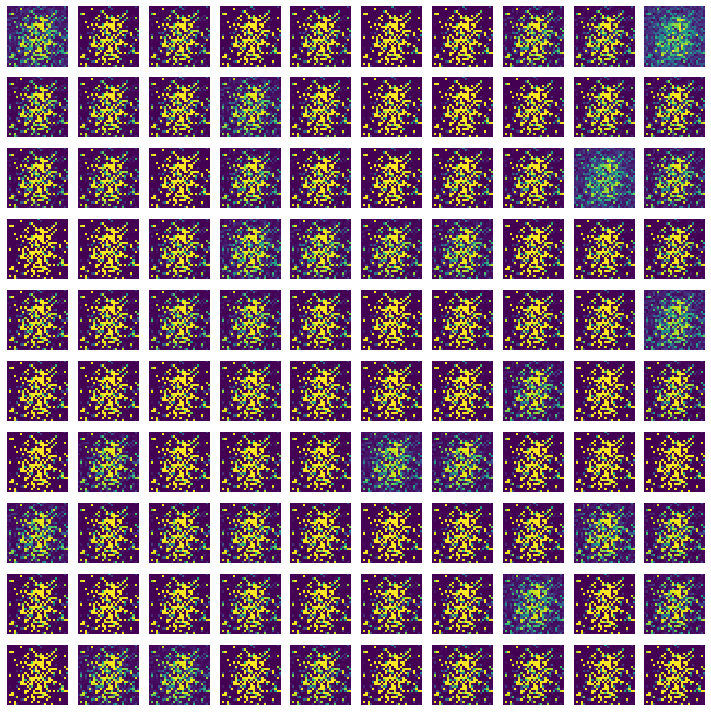

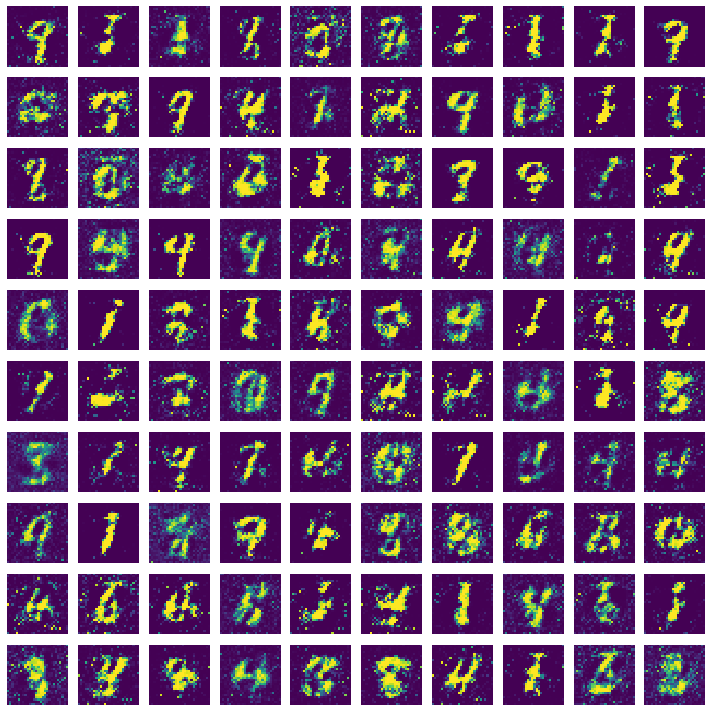

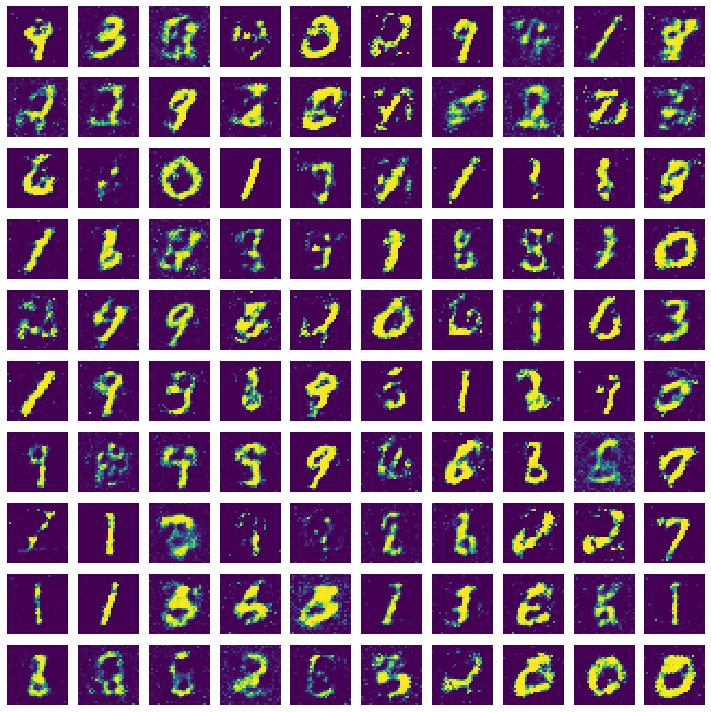

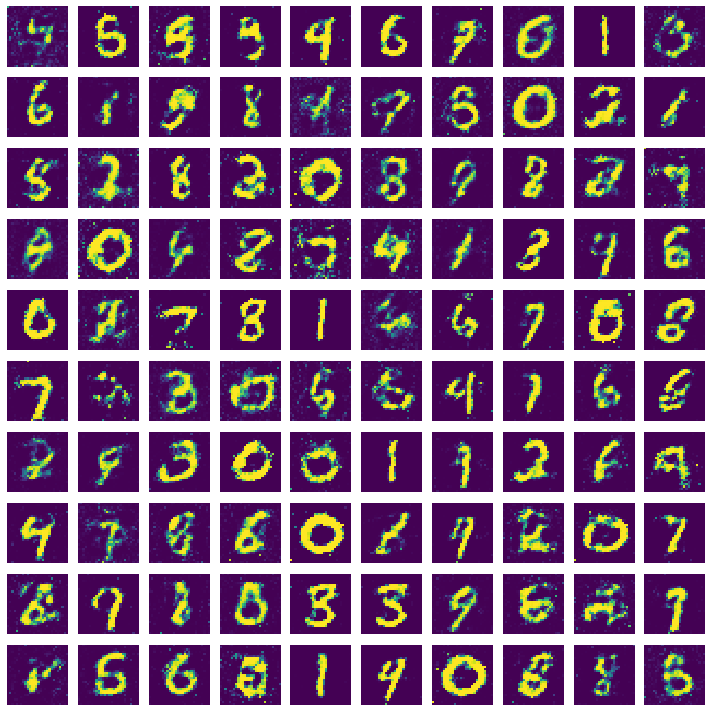

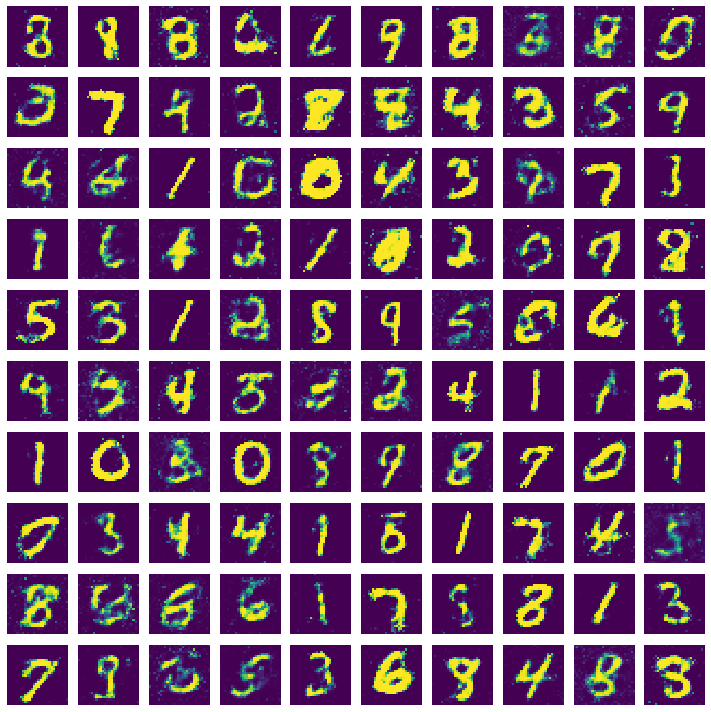

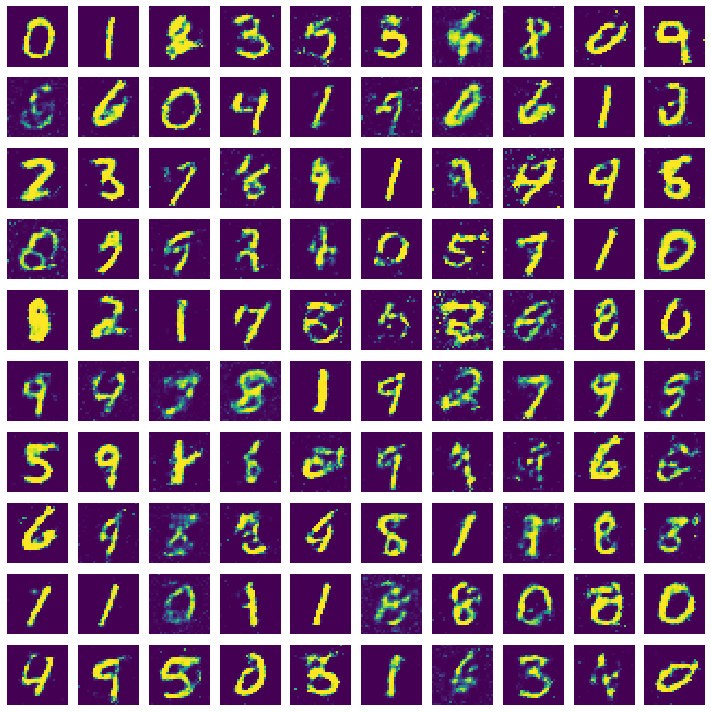

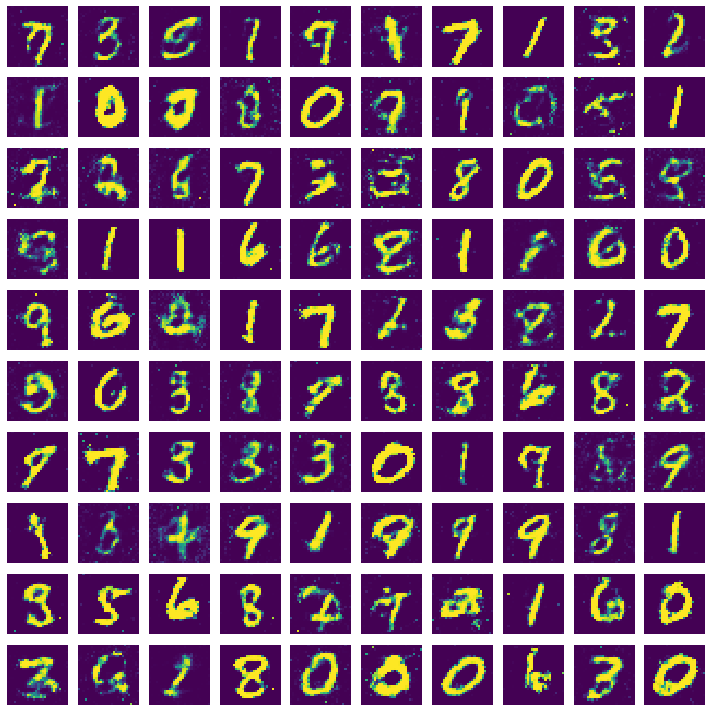

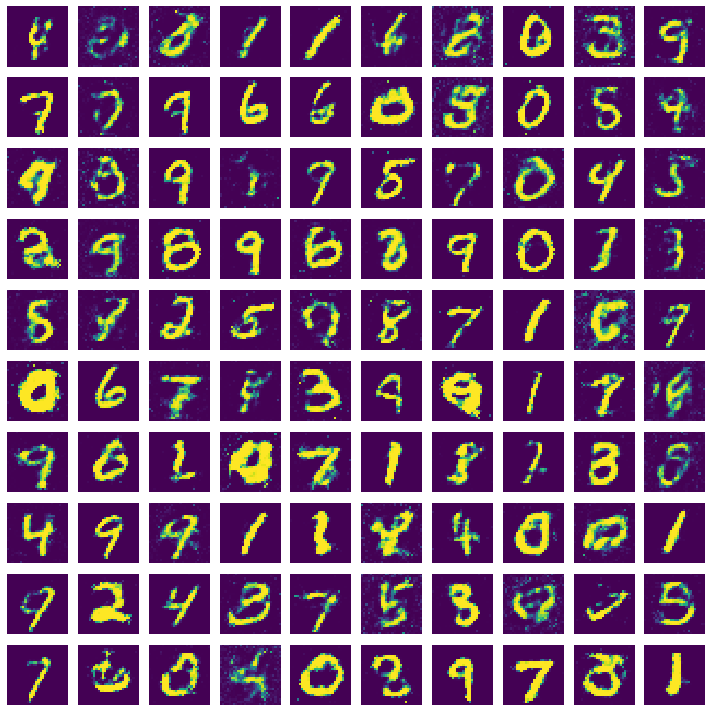

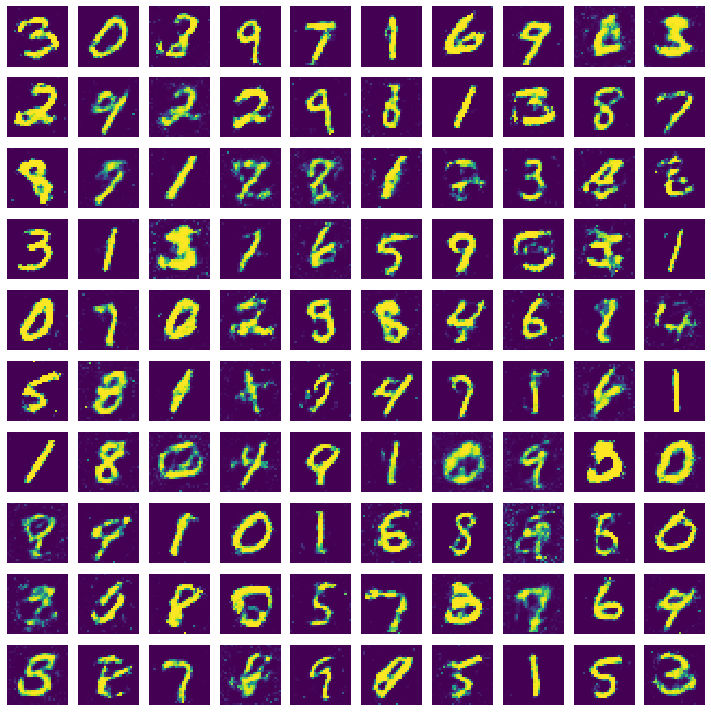

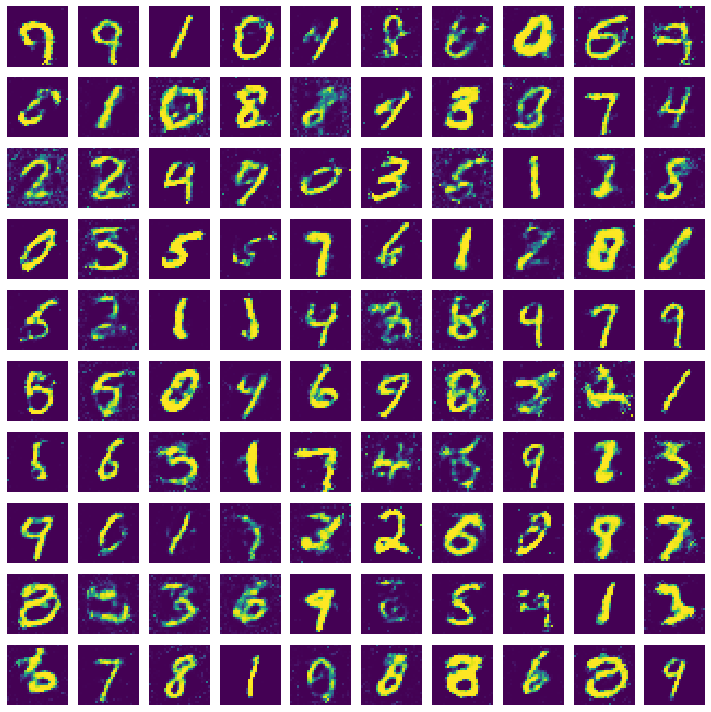

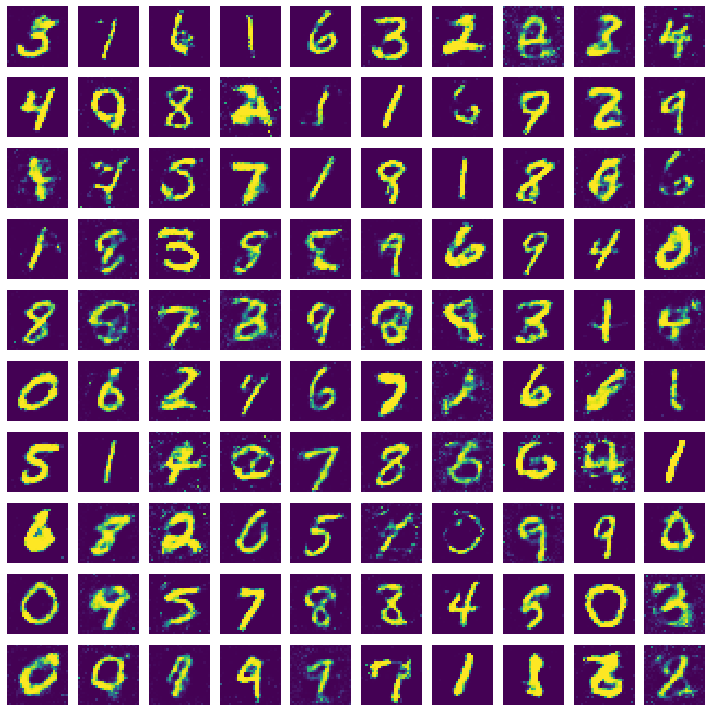

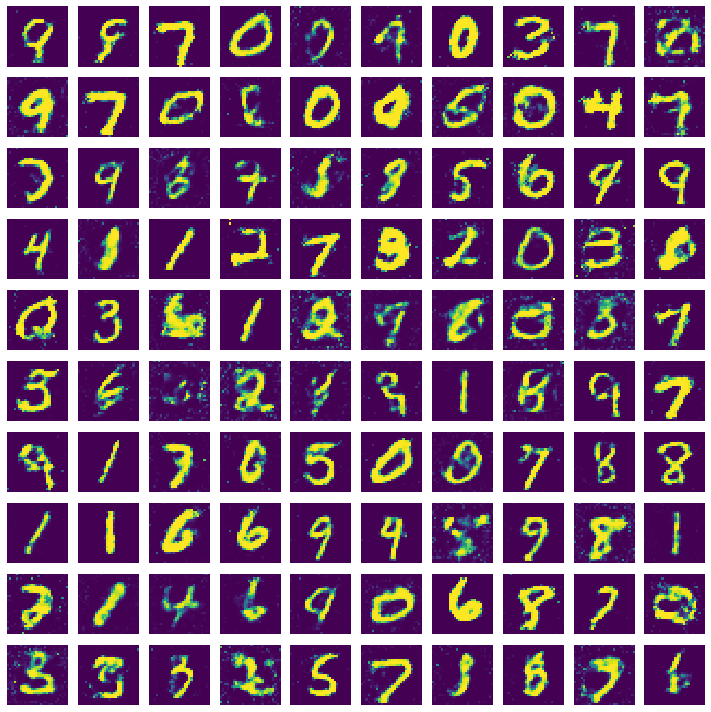

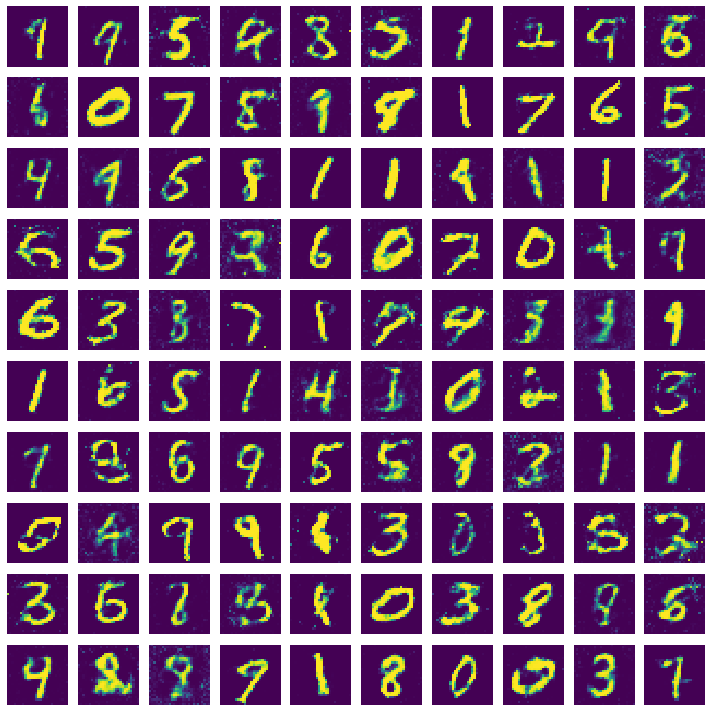

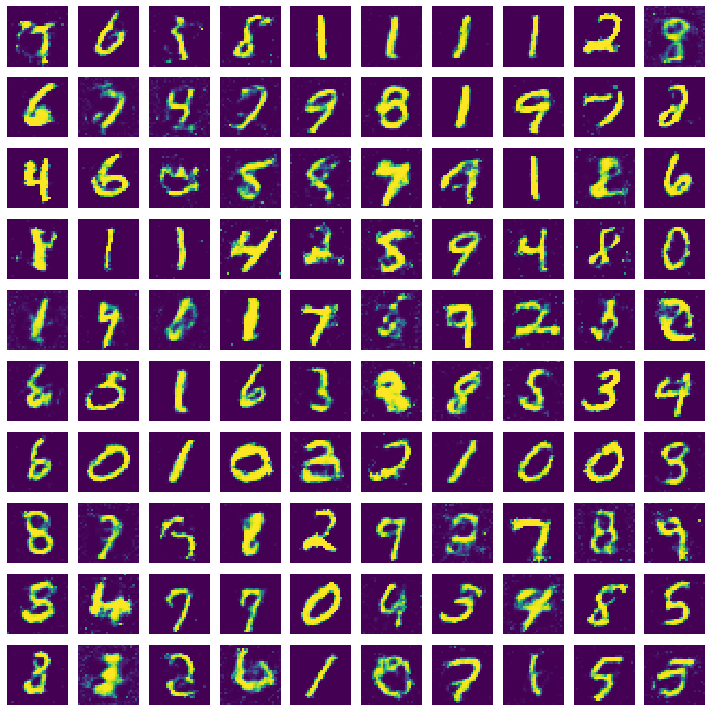

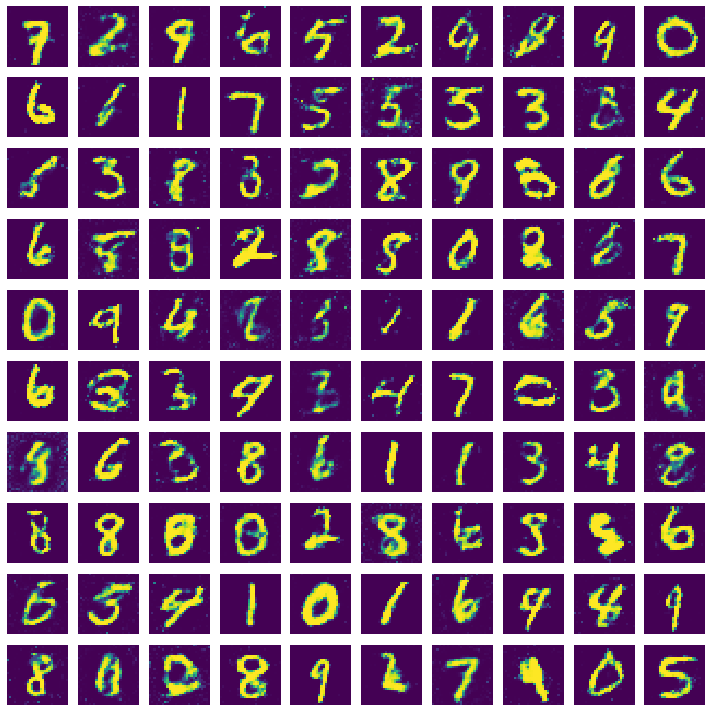

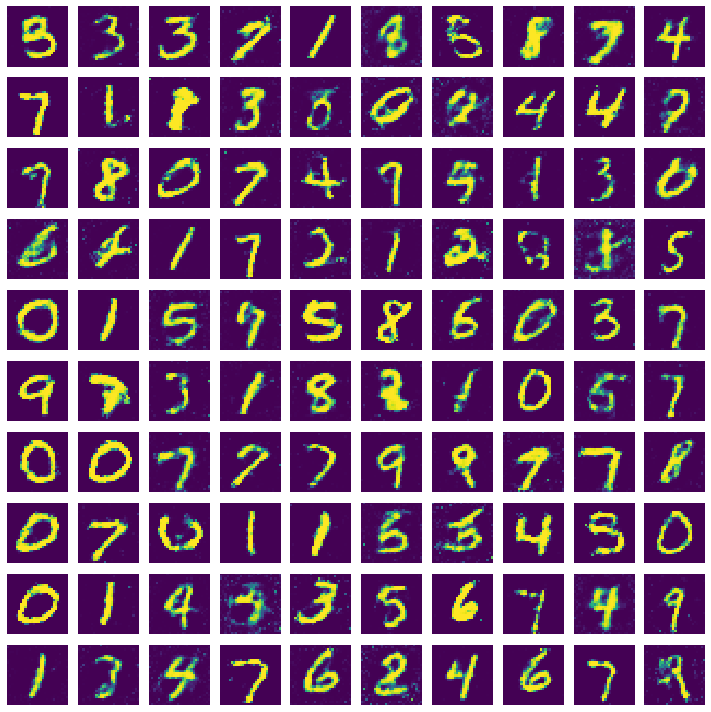

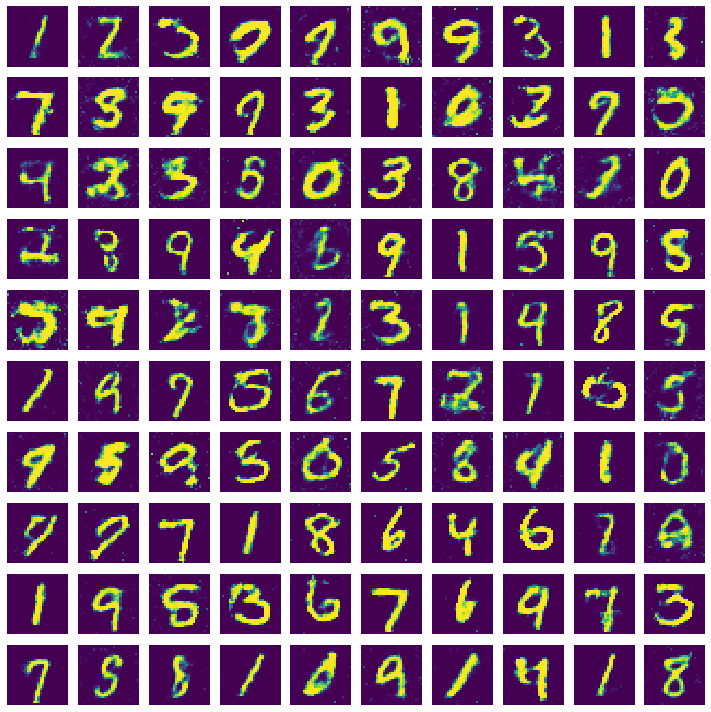

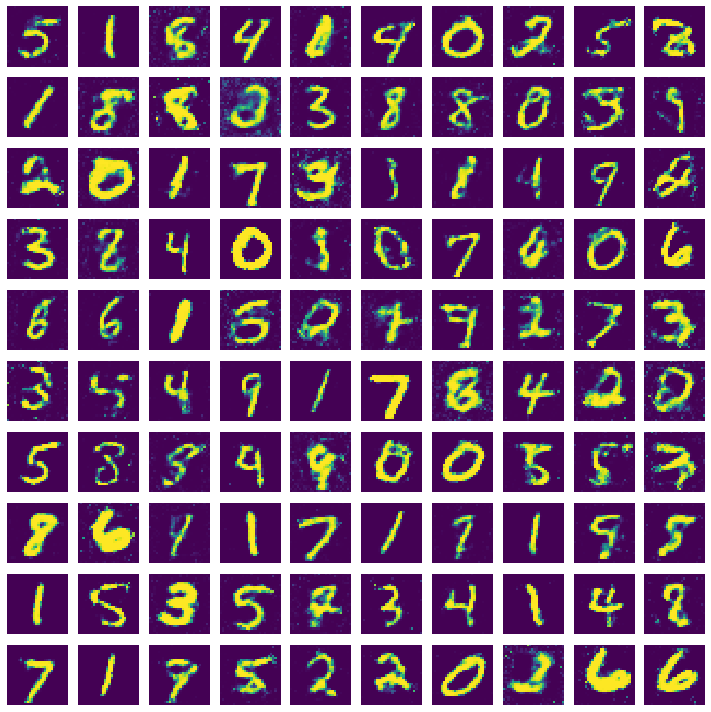

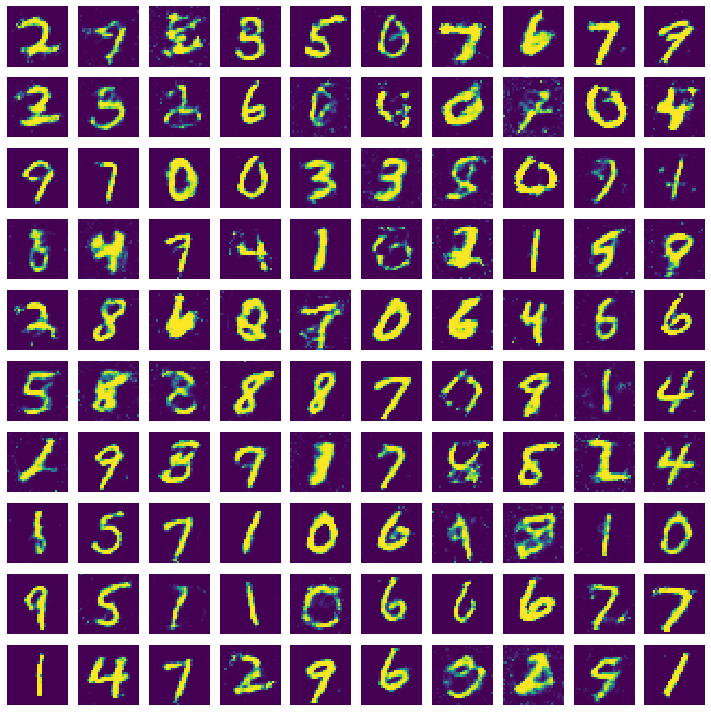

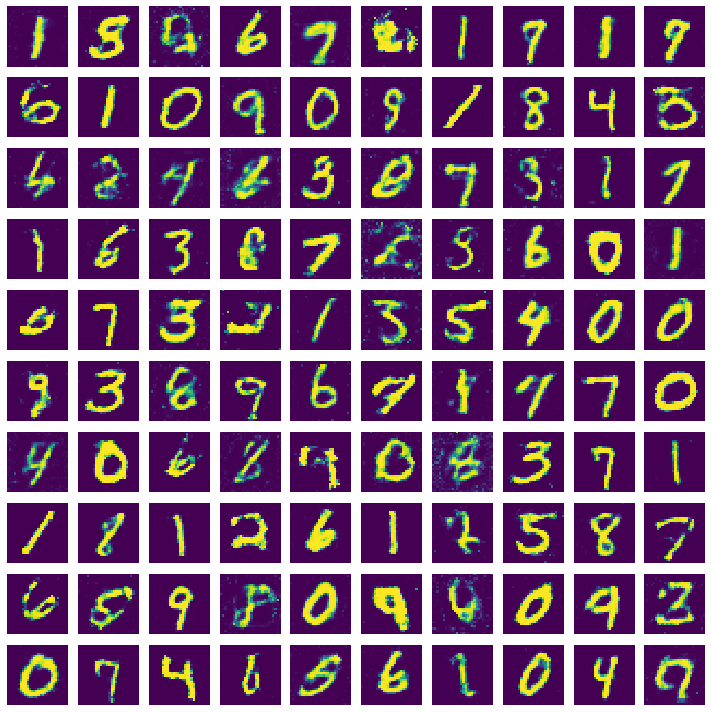

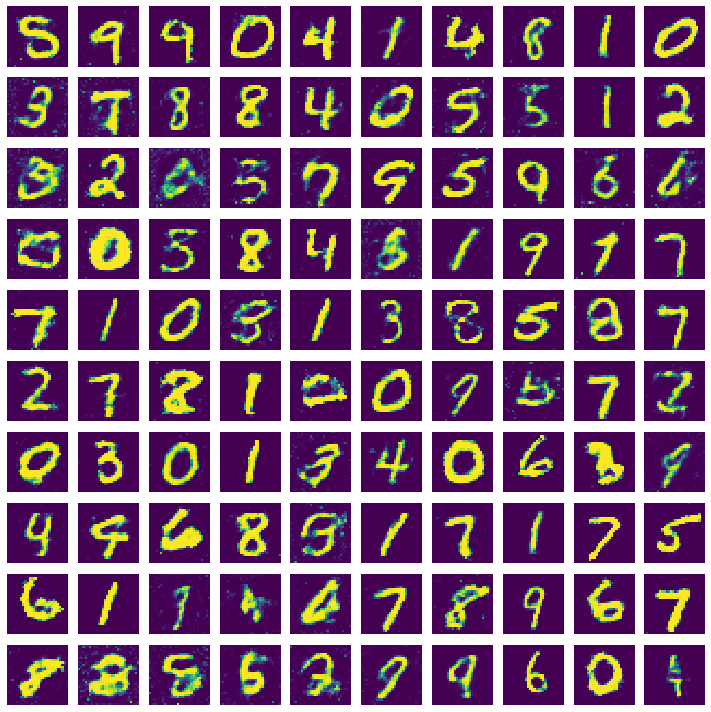

In [23]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(400,128)